finans sektöründe atılan tweetlerden duygu analizi yapılmaya çalışıldı.

1.Kütüphanelerin yüklenmesi

* #### [BOW](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)
    * #### [Decission Tree](#log)
    * #### [Random Forest](#log)
    
    

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [1]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence

"""Aşağıdaki kodun Eskisi from keras.preprocessing.text import Tokenizer"""
from tensorflow.keras.preprocessing.text import Tokenizer

from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

In [6]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/fintek/
df=pd.read_csv("cleaned_df.csv",index_col=0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/fintek


In [7]:
df = pd.read_csv('cleaned_df.csv', header=0)
print(df.head(20))


    Unnamed: 0                                                      text  \
0            0           spicejet to issue 4 crore warrants to promoters   
1            1                            mmtc q2 net loss at rs 4 crore   
2            2         mid cap funds can deliver more  stay put  experts   
3            3                    mid caps now turn into market darlings   
4            4  market seeing patience  if not conviction  prakash diwan   
5            5           infosys  will the strong volume growth sustain    
6            6                     hudco raises rs cr via tax free bonds   
7            7               hoec could retest 35 levels  ashwani gujral   
8            8              genpact appoints edward j fitzpatrick as cfo   
9            9            exl beats profit estimates  cuts sales outlook   
10          10            wait and watch on bharti airtel  vinay khattar   
11          11       would stick to banking  girish pai  centrum broking   
12          

In [8]:
df.isnull().values.any()

df.head()

,Unnamed: 0,text,score
0,0,spicejet to issue 4 crore warrants to promoters,0.0
1,1,mmtc q2 net loss at rs 4 crore,0.0
2,2,mid cap funds can deliver more stay put experts,1.0
3,3,mid caps now turn into market darlings,1.0
4,4,market seeing patience if not conviction prakash diwan,0.0


In [9]:
print(len(df))

21862


In [10]:
   print(df.columns)


Index(['Unnamed: 0', 'text', 'score'], dtype='object')


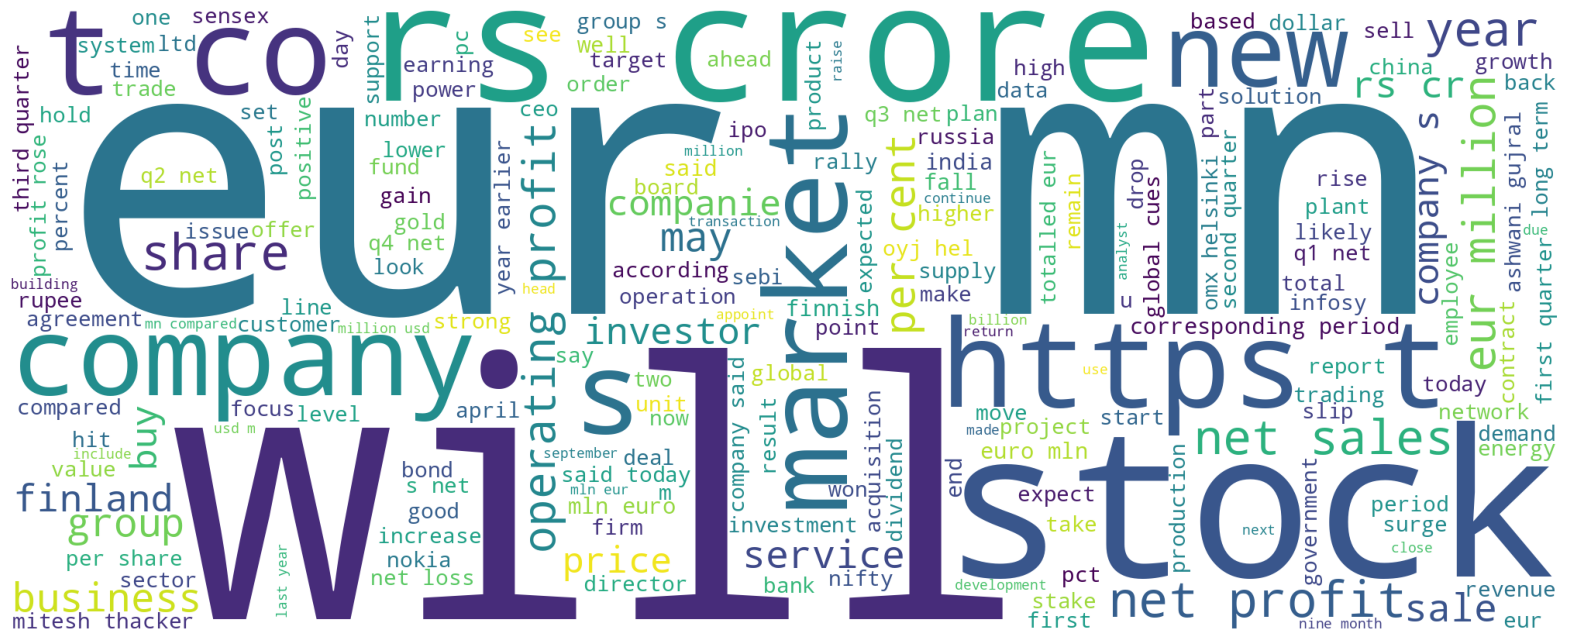

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

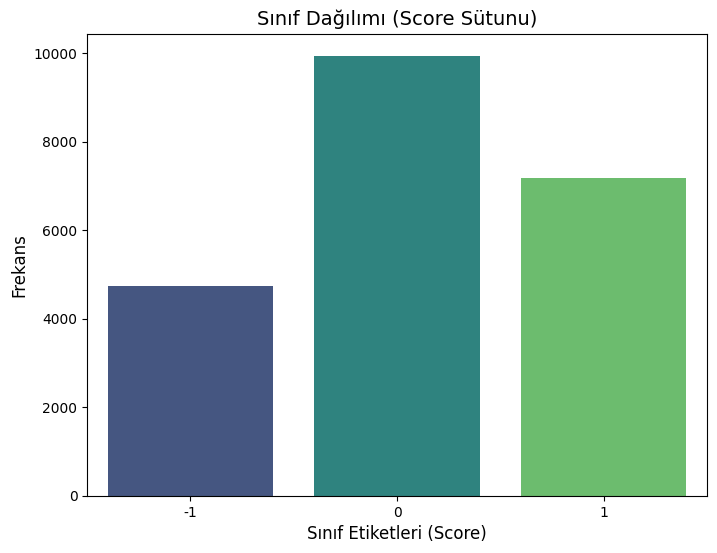

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Setini Yükleme
df = pd.read_csv('cleaned_df.csv')

# Sınıf Dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Sınıf Dağılımı (Score Sütunu)', fontsize=14)
plt.xlabel('Sınıf Etiketleri (Score)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['-1', '0', '1'])
plt.show()


In [ ]:
##DATA PREPROCESSING

In [12]:
import nltk
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the required NLTK data packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab data package

# Veri yükleme (örnek veri çerçevesi)
df = pd.read_csv("cleaned_df.csv")

# İlk 30 satırın ön işleme öncesi hali
print("Ön İşleme Öncesi İlk 30 Satır:\n")
print(df.head(30))

# 1. HTML Etiketlerini Çıkarma (Regex Yöntemi)
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

# 2. Metin Temizleme
def clean_text(text):
    text = remove_tags(text)  # HTML etiketlerini çıkarma
    text = text.lower()  # Küçük harfe dönüştürme
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldırma
    text = re.sub(r'\d+', '', text)  # Sayıları çıkarma
    text = re.sub(r'\s+', ' ', text).strip()  # Gereksiz boşlukları temizleme
    return text

df['text'] = df['text'].apply(clean_text)

# 3. Tokenization (Kelimeye Ayırma) - Özel karakterleri çıkarma
def tokenize_text(text):
    tokens = word_tokenize(text)  # Kelimelere ayırma
    tokens = [word for word in tokens if re.match(r'^[A-Za-z]+$', word)]  # Sadece harfleri içeren kelimeler
    return tokens

df['text'] = df['text'].apply(tokenize_text)

# 4. Stopword Kaldırma (Stopwords listesini özelleştir)
stop_words = set(stopwords.words('english'))
# Finans verisi olduğundan, "financial" gibi terimler bazen stopword sayılmamalı, özelleştirilmiş stopword listesi
stop_words.update(['will', 'the', 'for', 'from', 'when', 'what', 'how', 'about', 'that', 'this', 'can', 'in', 'on', 'with'])

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['text'] = df['text'].apply(remove_stopwords)

# 5. Lemmatization (Kelimeleri Anlamlı Hallerine Getirme)
lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['text'] = df['text'].apply(lemmatize_words)

# 6. Metni Tekrar Birleştirme (Vektörleştirme İçin)
df['text'] = df['text'].apply(lambda x: ' '.join(x))

# İlk 30 satırın ön işleme sonrası hali
print("\nÖn İşleme Sonrası İlk 30 Satır:\n")
print(df.head(30))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Ön İşleme Öncesi İlk 30 Satır:

    Unnamed: 0                                                      text  \
0            0           spicejet to issue 4 crore warrants to promoters   
1            1                            mmtc q2 net loss at rs 4 crore   
2            2         mid cap funds can deliver more  stay put  experts   
3            3                    mid caps now turn into market darlings   
4            4  market seeing patience  if not conviction  prakash diwan   
5            5           infosys  will the strong volume growth sustain    
6            6                     hudco raises rs cr via tax free bonds   
7            7               hoec could retest 35 levels  ashwani gujral   
8            8              genpact appoints edward j fitzpatrick as cfo   
9            9            exl beats profit estimates  cuts sales outlook   
10          10            wait and watch on bharti airtel  vinay khattar   
11          11       would stick to banking  girish pai 

In [13]:
df['Comment']=df['text'].apply(str)

In [14]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(clean_text(sen))

In [15]:
df

,Unnamed: 0,text,score,Comment
0,0,spicejet issue crore warrant promoter,0.0,spicejet issue crore warrant promoter
1,1,mmtc q net loss r crore,0.0,mmtc q net loss r crore
2,2,mid cap fund deliver stay put expert,1.0,mid cap fund deliver stay put expert
3,3,mid cap turn market darling,1.0,mid cap turn market darling
4,4,market seeing patience conviction prakash diwan,0.0,market seeing patience conviction prakash diwan
...,...,...,...,...
21857,21857,helsinki thomson financial share cargotec fell sharply early afternoon trade cargo handling group posted surprise drop april june profit overshadowed large number new order received three month,-1.0,helsinki thomson financial share cargotec fell sharply early afternoon trade cargo handling group posted surprise drop april june profit overshadowed large number new order received three month
21858,21858,london marketwatch share price ended lower london monday rebound bank stock failed offset broader weakness ftse,-1.0,london marketwatch share price ended lower london monday rebound bank stock failed offset broader weakness ftse
21859,21859,rinkuskiai beer sale fell per cent million litre kauno alus beer sale jumped per cent million litre,0.0,rinkuskiai beer sale fell per cent million litre kauno alus beer sale jumped per cent million litre
21860,21860,operating profit fell eur mn eur mn including vessel sale gain eur mn,-1.0,operating profit fell eur mn eur mn including vessel sale gain eur mn


*italik metin*###### %30-70

In [16]:
y=df['score']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
from sklearn import  preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [19]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=12000)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(15303, 12000) (6559, 12000)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'alpha': 0.1}
Accuracy: 0.7576
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.64      0.75      0.69      1185
         0.0       0.84      0.78      0.81      2485
         1.0       0.74      0.73      0.74      1796

    accuracy                           0.76      5466
   macro avg       0.74      0.75      0.75      5466
weighted avg       0.76      0.76      0.76      5466



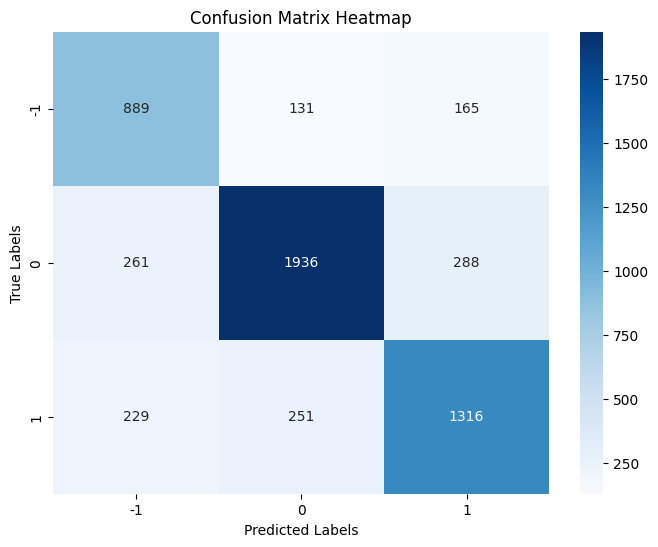

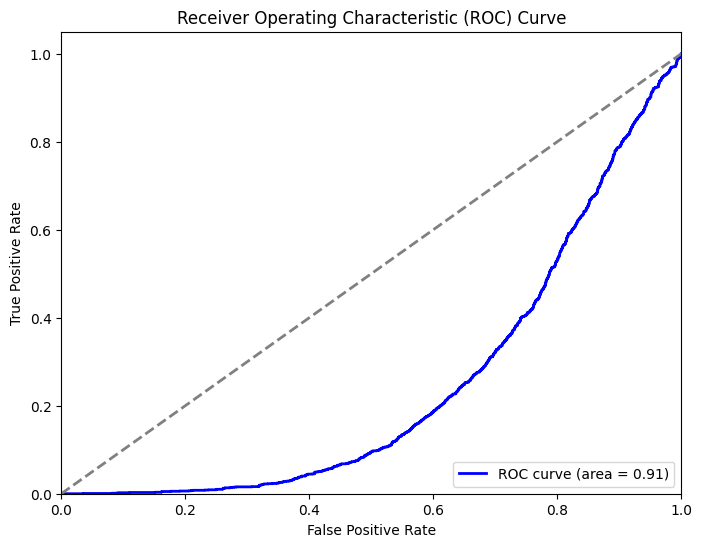

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi yükleyin (df['text'] ve df['score']'dan)
# X = df['text']
# y = df['score']

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TF-IDF Vektörleştirme
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=12000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# SMOTE ile Veri Dengeleme (k_neighbors parametresi ile)
smote = SMOTE(random_state=42, k_neighbors=5)  # k_neighbors=5
X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)

# Naive Bayes Modeli
nb = MultinomialNB().fit(X_train_res, y_train_res)  # Yalnızca eğitim verileri ile model eğitildi

# Hiperparametre Optimasyonu (Grid Search)
param_grid = {
    'alpha': [0.1, 0.2, 0.5, 1.0],  # L2 Regularization için alpha parametresi
}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_res, y_train_res)

# En iyi parametreleri yazdırma
print(f"Best parameters: {grid_search.best_params_}")

# Modeli test seti ile değerlendirme
y_pred = grid_search.best_estimator_.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

# Sonuçları yazdırma
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i Heatmap ile Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['-1', '0', '1'], yticklabels=['-1', '0', '1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC AUC Değeri ve Eğrisi
roc_auc = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test_vec), multi_class='ovr')
fpr, tpr, _ = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test_vec)[:, 1], pos_label=1)

# ROC AUC Eğrisini Görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###### BOW

###### NB

###### SVM

In [24]:
#eğitim ve test oranı %80 -%20 olarak ayarlandı

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn import  preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [21]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10800)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(17489, 10800) (4373, 10800)


In [23]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Model eğitimi
l2_norm = 2
l2_norm_inverse = 1 / l2_norm
maximum_iterations = 4000
svm = LinearSVC(C=l2_norm_inverse, max_iter=maximum_iterations)
SVM = svm.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin
predictions_SVM = SVM.predict(test_vectors)

# Doğruluk skoru
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test) * 100)

# Sınıfların doğru görünmesi için classification_report düzeltmesi
target_names = ['-1', '0', '1']  # Sınıf isimlerini doğru şekilde belirtin
print(classification_report(y_test, predictions_SVM, target_names=target_names))


SVM Accuracy Score ->  82.41481820260691
              precision    recall  f1-score   support

          -1       0.80      0.75      0.77       948
           0       0.85      0.87      0.86      1988
           1       0.81      0.80      0.81      1437

    accuracy                           0.82      4373
   macro avg       0.82      0.81      0.81      4373
weighted avg       0.82      0.82      0.82      4373



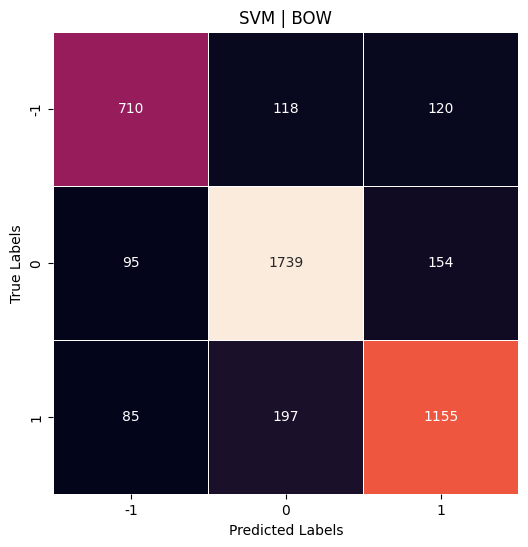

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, predictions_SVM)

# Görselleştirme
plt.figure(figsize=(6, 6))
plt.title("SVM | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5, cbar=False,
            xticklabels=["-1", "0", "1"], yticklabels=["-1", "0", "1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


###### LOG REG

In [28]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  82.07180425337297


In [29]:
from sklearn.metrics import classification_report

# Sınıfları yeniden adlandırma
target_names = ["-1", "0", "1"]

# classification_report ile etiketleri özelleştirme
print(classification_report(y_test, predictions_log, target_names=target_names))


              precision    recall  f1-score   support

          -1       0.81      0.73      0.77       948
           0       0.83      0.88      0.85      1988
           1       0.82      0.79      0.81      1437

    accuracy                           0.82      4373
   macro avg       0.82      0.80      0.81      4373
weighted avg       0.82      0.82      0.82      4373



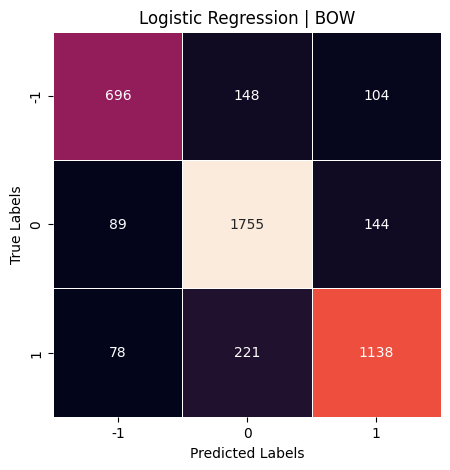

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, predictions_log)

# Görselleştirme
plt.figure(figsize=(5, 5))
plt.title("Logistic Regression | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5, cbar=False,
            xticklabels=["-1", "0", "1"], yticklabels=["-1", "0", "1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


###### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)
predictions_tree = tree_clf.predict(test_vectors)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)

Decision Tree Accuracy Score ->  79.92225017150697


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

        -1.0       0.76      0.70      0.73       948
         0.0       0.83      0.85      0.84      1988
         1.0       0.78      0.79      0.78      1437

    accuracy                           0.80      4373
   macro avg       0.79      0.78      0.79      4373
weighted avg       0.80      0.80      0.80      4373



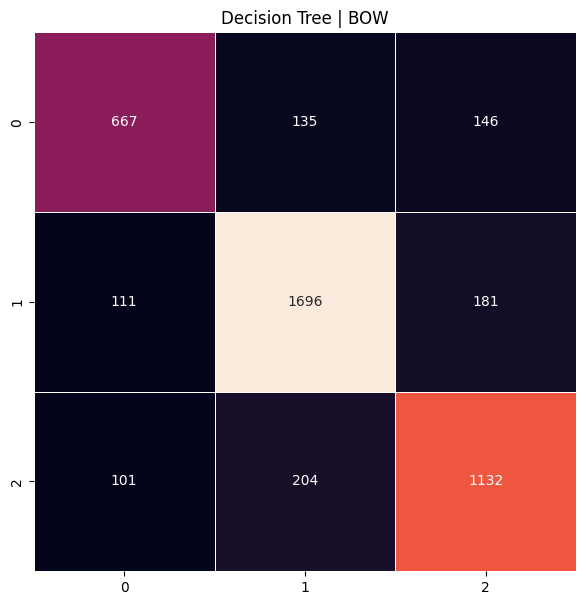

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | BOW")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  83.67253601646468


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       970
           1       0.79      0.94      0.86      1947
           2       0.88      0.79      0.83      1456

    accuracy                           0.84      4373
   macro avg       0.86      0.81      0.83      4373
weighted avg       0.85      0.84      0.83      4373



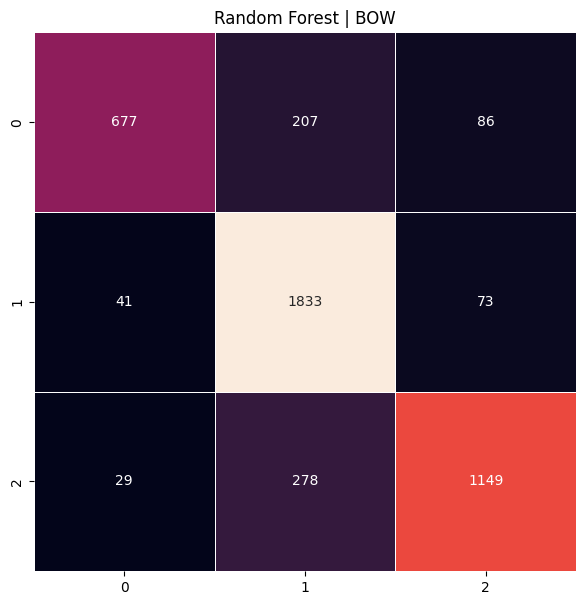

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | BOW")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


* #### [TF_IDF](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [KNN](#svm)
    * #### [LOGISTIC REG](#log)


######Kütüphanelerin Yüklenmesi

In [ ]:
df=pd.read_csv("cleaned_df.csv",index_col=0)

<Axes: xlabel='score', ylabel='count'>

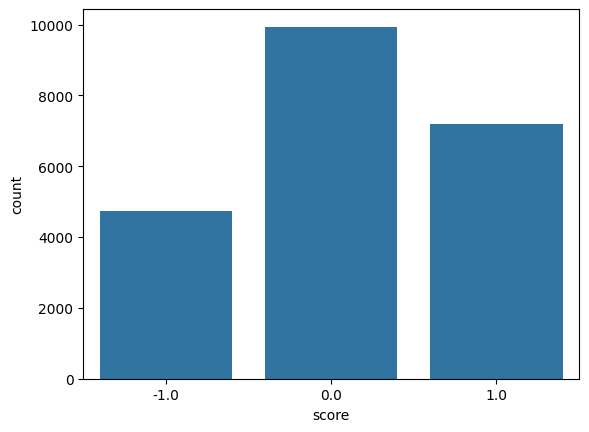

In [ ]:
import seaborn as sns
sns.countplot(x='score', data=df)

In [ ]:
X = []
# Assuming 'text' is the column containing the text data
sentences = list(df['text'])
for sen in sentences:
    X.append(clean_text(sen))

In [ ]:
y = df['score']

In [ ]:
y.shape

(21862,)

###### %30-70

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42 ,stratify=y)

---
<a id="p1"></a>
###### TF-IDF

In [ ]:
#feature extraction with Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=8000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(15303, 8000) (6559, 8000)


In [ ]:
print(test_vectors)

  (0, 764)	0.47036966769617644
  (0, 1268)	0.16091229277405242
  (0, 2150)	0.18630891886460182
  (0, 2559)	0.2733369025385488
  (0, 2730)	0.10874529389457414
  (0, 3226)	0.07181787973354006
  (0, 3800)	0.47912949285521106
  (0, 3802)	0.27021066946873545
  (0, 3924)	0.2623004042824456
  (0, 4165)	0.2842666156183621
  (0, 4625)	0.22117262165547408
  (0, 5020)	0.14568278056854303
  (0, 6012)	0.19155821581518226
  (0, 6657)	0.21296573187898987
  (0, 7147)	0.06601177831065894
  (0, 7933)	0.13310518679928887
  (1, 355)	0.15046862519425008
  (1, 819)	0.4425487812883377
  (1, 1956)	0.34064753377257095
  (1, 2004)	0.34656743649935967
  (1, 2226)	0.3592681041147897
  (1, 3418)	0.1927431110480928
  (1, 3776)	0.4136621193907689
  (1, 4460)	0.25635970966316046
  (1, 5886)	0.3772266049168742
  :	:
  (6556, 4678)	0.16464480937884704
  (6556, 6606)	0.4080871493041005
  (6556, 6734)	0.3941908528539454
  (6556, 7735)	0.34720610659055207
  (6557, 937)	0.40543934226747025
  (6557, 1762)	0.2828819235042442


<a id="nb"></a>
###### NB

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 ,stratify=y)

In [ ]:
# Cell 96: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Cell 100: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,stratify=y)

# Cell 96 (Continued): Fit vectorizer AFTER train-test split
vectorizer = TfidfVectorizer(max_features=8000)
train_vectors = vectorizer.fit_transform(X_train) # Now X_train is the correct one from the split
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

# Cell 101: Model Training (No changes needed here)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

(17489, 8000) (4373, 8000)


In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  76.35490509947405


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

        -1.0       0.85      0.59      0.70       948
         0.0       0.77      0.85      0.81      1988
         1.0       0.72      0.76      0.74      1437

    accuracy                           0.76      4373
   macro avg       0.78      0.73      0.75      4373
weighted avg       0.77      0.76      0.76      4373



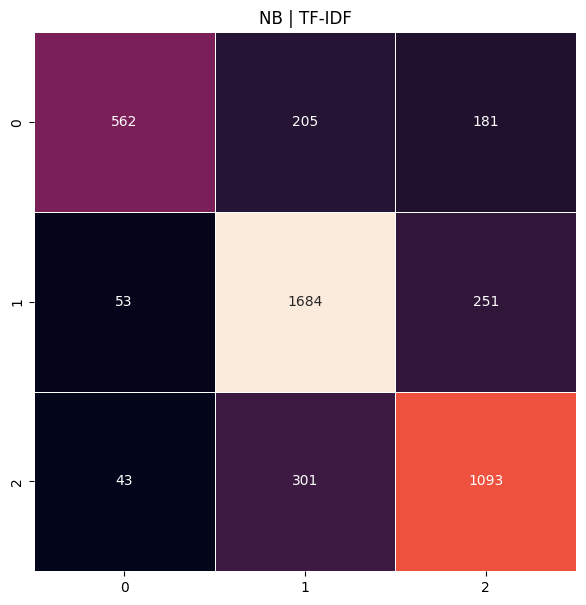

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

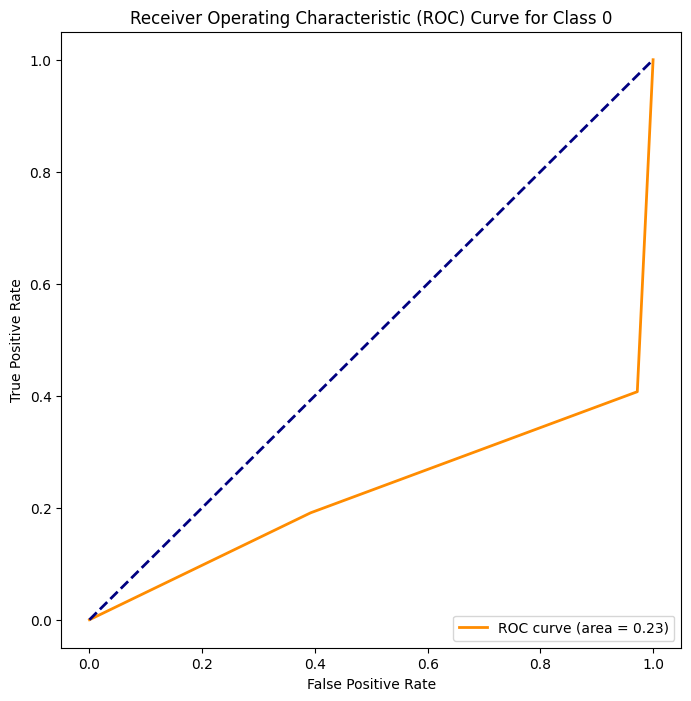

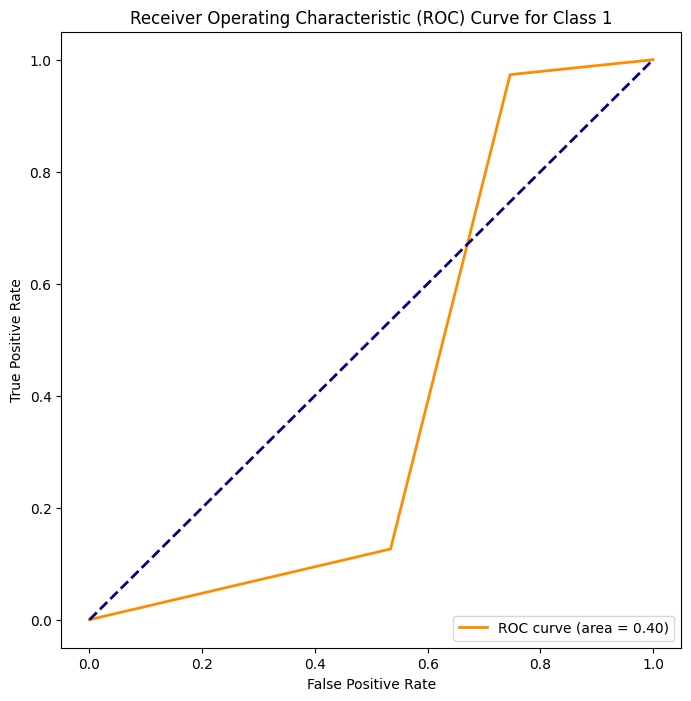

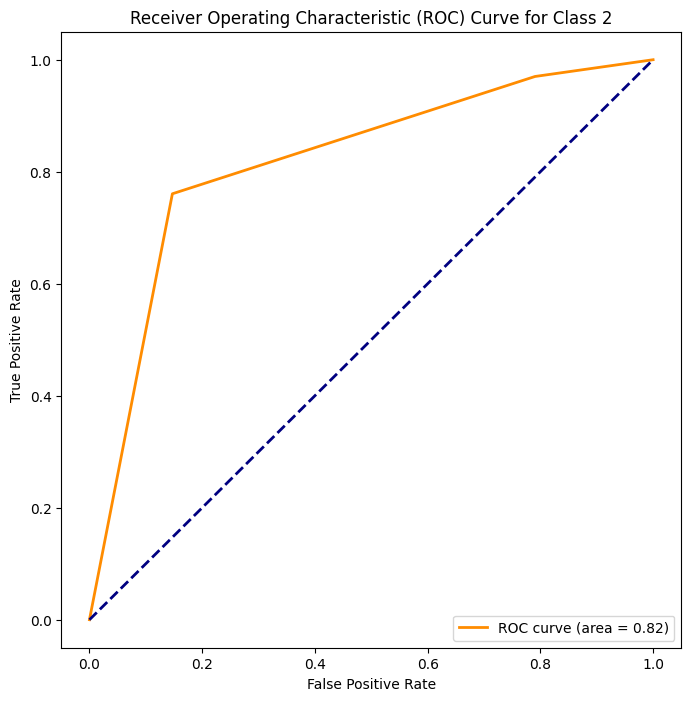

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Assuming you have already imported necessary libraries and have y_test, predicted

# Binarize the multiclass labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Iterate through each class and plot the ROC curve
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], predicted) # Assuming 'predicted' contains probabilities for the current class
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for Class {i}')
    plt.legend(loc='lower right')
    plt.show()

<a id="svm"></a>
###### SVM  

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 1
l2_norm_inverse = 1/l2_norm
maximum_iterations=4500 #maximum number of iterations
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model

SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  84.28996112508575


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

        -1.0       0.83      0.78      0.81       948
         0.0       0.85      0.89      0.87      1988
         1.0       0.85      0.82      0.83      1437

    accuracy                           0.84      4373
   macro avg       0.84      0.83      0.84      4373
weighted avg       0.84      0.84      0.84      4373



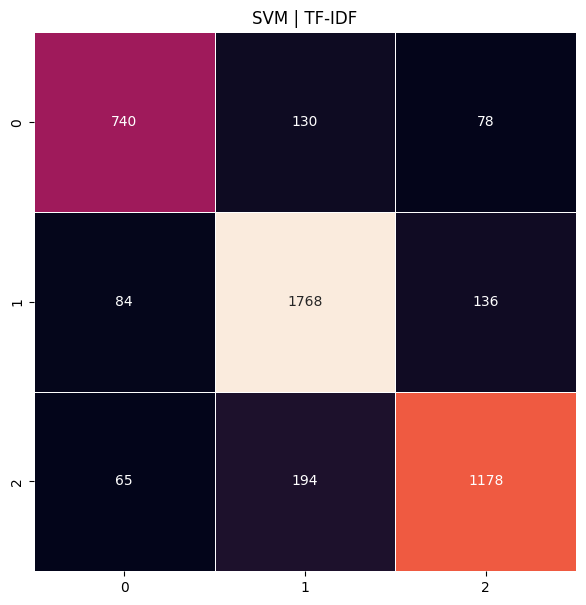

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


<a id="log"></a>
###### Logistic Regresion

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  82.16327463983535


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

        -1.0       0.86      0.71      0.78       948
         0.0       0.80      0.90      0.85      1988
         1.0       0.83      0.79      0.81      1437

    accuracy                           0.82      4373
   macro avg       0.83      0.80      0.81      4373
weighted avg       0.82      0.82      0.82      4373



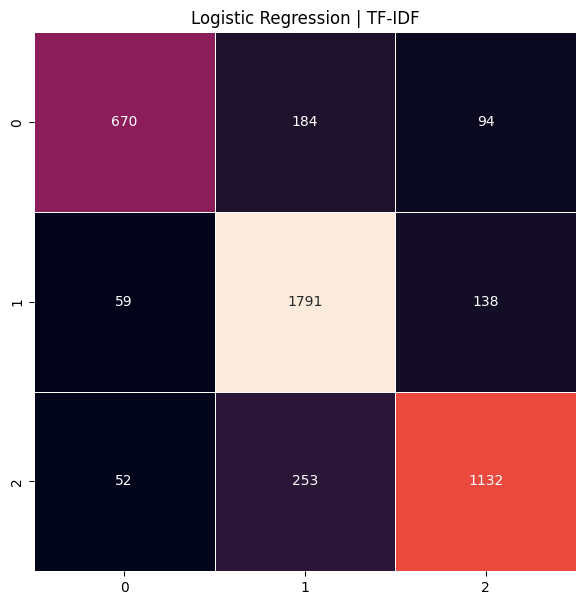

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

<a id="knn"></a>
###### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 27
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn=knn.fit(train_vectors, y_train)
predictions_knn = model_knn.predict(test_vectors)
print("KNN Accuracy Score -> ",accuracy_score(predictions_knn, y_test)*100)





KNN Accuracy Score ->  73.3821175394466


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

        -1.0       0.75      0.56      0.64       948
         0.0       0.72      0.88      0.80      1988
         1.0       0.74      0.64      0.69      1437

    accuracy                           0.73      4373
   macro avg       0.74      0.69      0.71      4373
weighted avg       0.74      0.73      0.73      4373



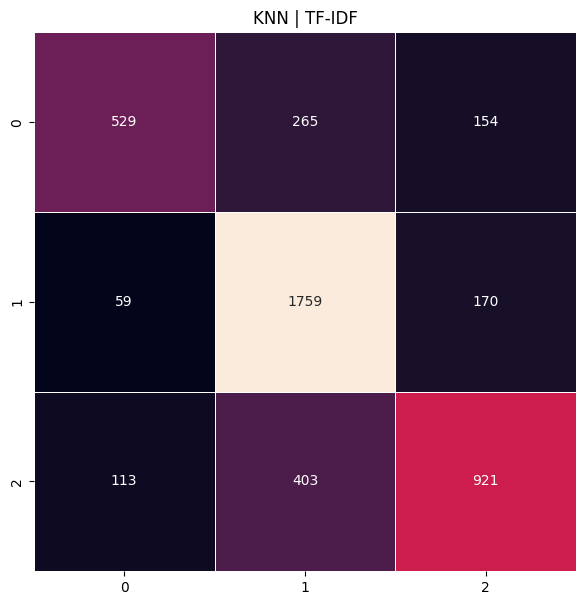

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(7,7))
plt.title("KNN | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

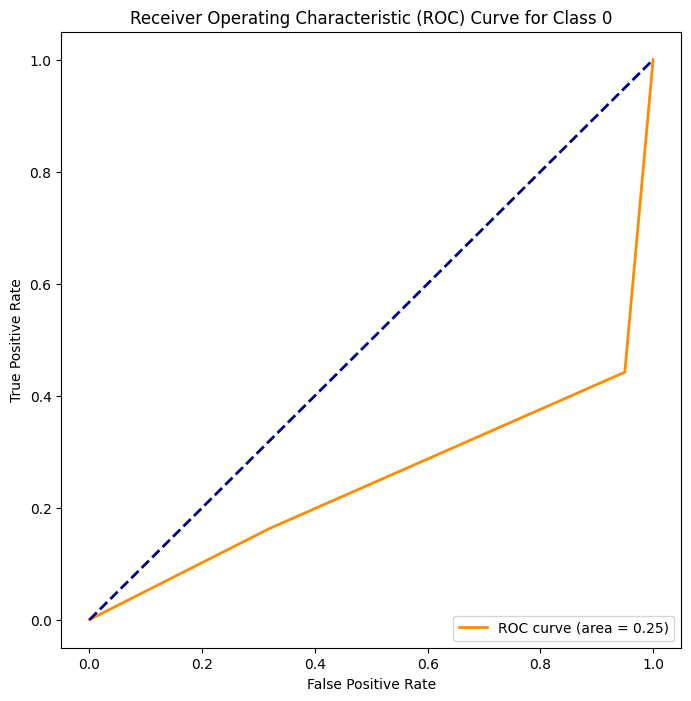

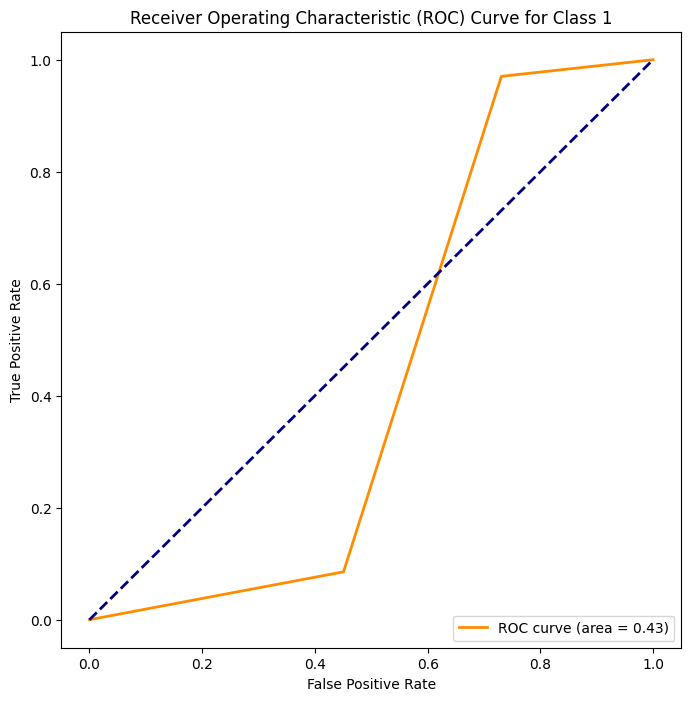

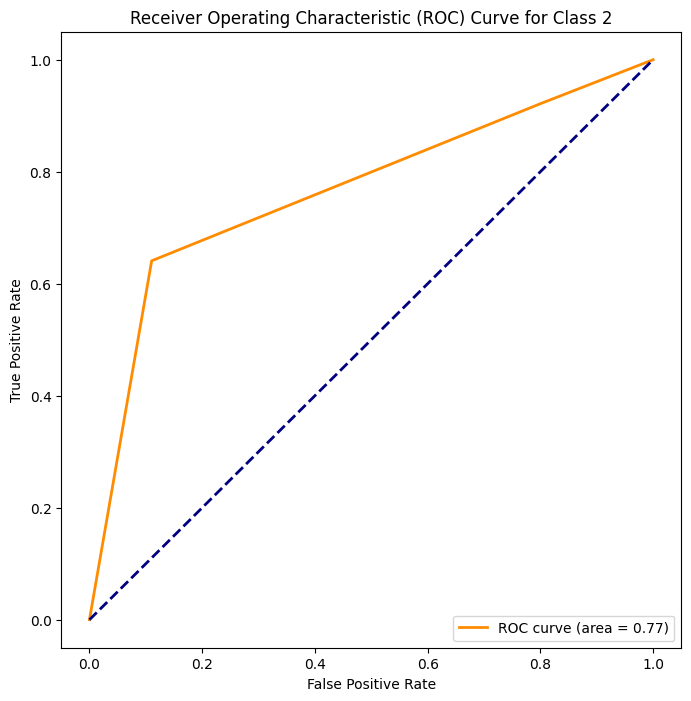

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the multiclass labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Assuming 'predictions_knn' contains probabilities for each class
# If not, use predict_proba to get probabilities
# predictions_knn_proba = model_knn.predict_proba(test_vectors)

# Iterate through each class and plot the ROC curve
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], predictions_knn)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for Class {i}')
    plt.legend(loc='lower right')
    plt.show()

###### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree sınıflandırıcısını tanımla
tree_clf = DecisionTreeClassifier()

# Modeli eğit
tree_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_tree = tree_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)


Decision Tree Accuracy Score ->  79.19048707980791


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_tree))


              precision    recall  f1-score   support

        -1.0       0.77      0.68      0.73       948
         0.0       0.81      0.86      0.83      1988
         1.0       0.78      0.77      0.78      1437

    accuracy                           0.79      4373
   macro avg       0.79      0.77      0.78      4373
weighted avg       0.79      0.79      0.79      4373



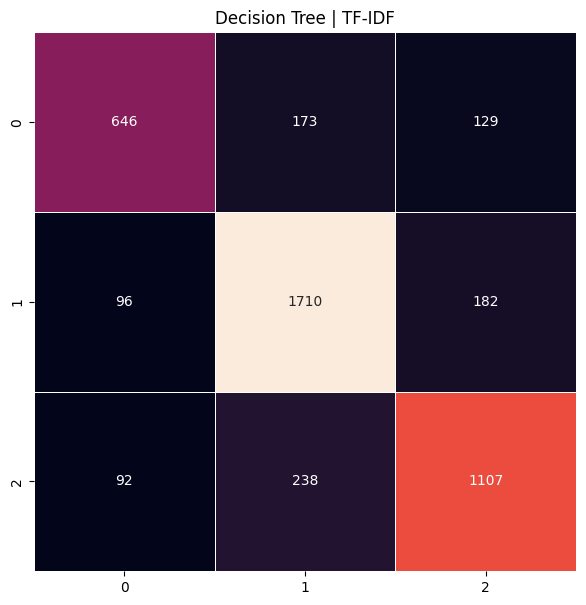

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | TF-IDF")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


######Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  82.62062657214727


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))


              precision    recall  f1-score   support

        -1.0       0.91      0.67      0.77       948
         0.0       0.79      0.93      0.85      1988
         1.0       0.85      0.78      0.81      1437

    accuracy                           0.83      4373
   macro avg       0.85      0.80      0.81      4373
weighted avg       0.83      0.83      0.82      4373



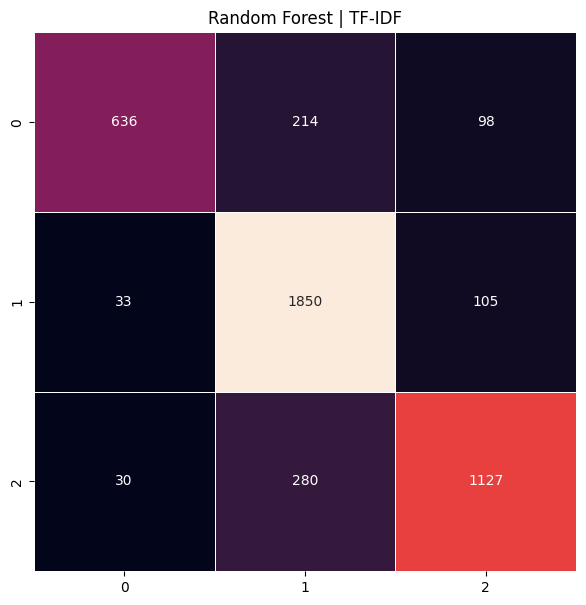

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | TF-IDF")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


In [ ]:
##BIRECTIONAL LSTM MODELİ

In [ ]:
#düşük sınıfa yüksek ağırlık learning rate=0.001 max features=10000 kernel regularizer=0.05 batch size=16

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

# Hiperparametreler
max_features = 10000  # Maksimum kelime sayısı
max_len = 100  # Maksimum dizi uzunluğu
embedding_dim = 128  # Gömme boyutu


# Tokenizer tanımla ve veriyi dönüştür
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)  # X_train metin verisi

# Eğitim ve test verilerini tam sayılara çevir ve sıfırlarla doldur
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# One-hot encoding ile etiketleri dönüştür
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

# Sınıf ağırlıklarını belirleyin (dengesiz sınıflar için)
class_weights = {0: 1., 1: 2., -1: 3.}

# LSTM modelini oluştur
model = Sequential([
    Embedding(max_features, embedding_dim, input_length=max_len, trainable=True),
    Bidirectional(LSTM(128, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='he_normal', return_sequences=True, kernel_regularizer=l2(0.01))),
    Bidirectional(LSTM(64, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='he_normal', kernel_regularizer=l2(0.05))),
    BatchNormalization(),  # BatchNormalization ekleyin
    Dropout(0.4),
    Dense(3, activation='softmax')  # Softmax aktivasyon ile çoklu sınıf çıkışı
])

# Öğrenme oranını ayarlayın
optimizer = Adam(learning_rate=0.001)

# Modeli derle
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma ile eğitimi durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğit
history = model.fit(
    X_train_pad, y_train_onehot,  # y_train_onehot çoklu sınıf etiketlerinin one-hot kodlanmış hali
    epochs=50, batch_size=16,
    validation_split=0.2,
    class_weight=class_weights,  # Sınıf ağırlıklarını ekle
    callbacks=[early_stopping]
)

# Test verileri üzerinde tahmin yap
predictions_rnn = np.argmax(model.predict(X_test_pad), axis=1)  # Çoklu sınıf tahmini

# Doğruluk skorunu hesapla
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print(f"LSTM Accuracy Score -> {accuracy * 100:.2f}%")

# Detaylı metrik raporu
print(classification_report(np.argmax(y_test_onehot, axis=1), predictions_rnn))

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print("Confusion Matrix:\n", conf_matrix)

# ROC AUC skoru
roc_auc = roc_auc_score(y_test_onehot, model.predict(X_test_pad), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")


Epoch 1/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 297s 326ms/step - accuracy: 0.6173 - loss: 17.4868 - val_accuracy: 0.6069 - val_loss: 0.9234
Epoch 2/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 312s 315ms/step - accuracy: 0.8338 - loss: 0.5897 - val_accuracy: 0.4846 - val_loss: 1.8188
Epoch 3/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 330s 325ms/step - accuracy: 0.8764 - loss: 0.4520 - val_accuracy: 0.7090 - val_loss: 0.8377
Epoch 4/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 314s 316ms/step - accuracy: 0.8981 - loss: 0.3677 - val_accuracy: 0.8025 - val_loss: 0.6329
Epoch 5/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 323s 317ms/step - accuracy: 0.9113 - loss: 0.3260 - val_accuracy: 0.7579 - val_loss: 0.8541
Epoch 6/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 329s 325ms/step - accuracy: 0.9244 - loss: 0.2834 - val_accuracy: 0.7990 - val_loss: 0.7751
Epoch 7/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 279s 319ms/step - accuracy: 0.9289 - loss: 0.2743 - val_accuracy: 0.6795 - val_loss: 1.7169
Epoch 8/50
875/875 ━━━━━━━━━━━━━━━━━━━━ 323s 320ms/step - accuracy: 0.9395 

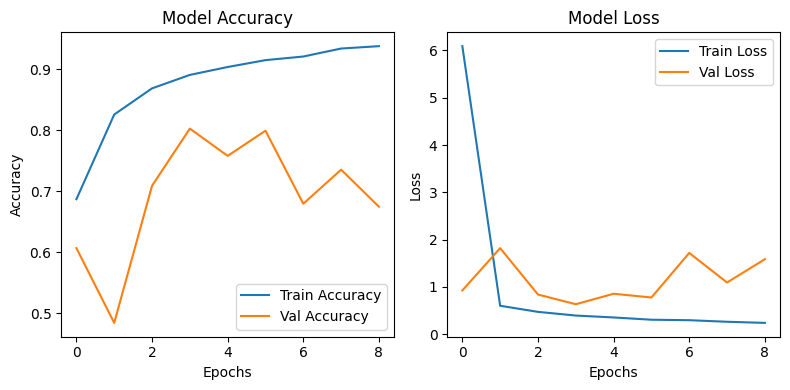

In [42]:
import matplotlib.pyplot as plt

# Eğitim geçmişi doğrulama doğruluğu ve doğrulama kaybını çizme
def plot_training_history(history):
    # Doğrulama doğruluğu eğrisini çiz
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Doğrulama kaybı eğrisini çiz
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Eğitim sonrası eğriyi çiz
plot_training_history(history)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

# Hiperparametreler
max_features = 5000  # Maksimum kelime sayısı
max_len = 100  # Maksimum dizi uzunluğu
embedding_dim = 128  # Gömme boyutu

# Veri setinizi hazırlayın (X ve y)
# X_train, X_test ve y_train, y_test veri setlerinin doğru şekilde tanımlandığından emin olun
# Örnek: X_train = ['metin1', 'metin2', ...], y_train = [-1, 0, 1, ...]

# Tokenizer tanımla ve veriyi dönüştür
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)  # X_train metin verisi

# Eğitim ve test verilerini tam sayılara çevir ve sıfırlarla doldur
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# One-hot encoding ile etiketleri dönüştür
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

# Sınıf ağırlıklarını belirleyin (dengesiz sınıflar için)
class_weights = {0: 1., 1: 2., -1: 2.}

# LSTM modelini oluştur
model = Sequential([
    Embedding(max_features, embedding_dim, input_length=max_len, trainable=True),
    Bidirectional(LSTM(128, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='he_normal', return_sequences=True, kernel_regularizer=l2(0.01))),
    Bidirectional(LSTM(64, activation='tanh', recurrent_activation='sigmoid', kernel_initializer='he_normal', kernel_regularizer=l2(0.01))),
    BatchNormalization(),  # BatchNormalization ekleyin
    Dropout(0.4),
    Dense(3, activation='softmax')  # Softmax aktivasyon ile çoklu sınıf çıkışı
])

# Öğrenme oranını ayarlayın
optimizer = Adam(learning_rate=0.0005)

# Modeli derle
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma ile eğitimi durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğit
history = model.fit(
    X_train_pad, y_train_onehot,  # y_train_onehot çoklu sınıf etiketlerinin one-hot kodlanmış hali
    epochs=50, batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,  # Sınıf ağırlıklarını ekle
    callbacks=[early_stopping]
)

# Test verileri üzerinde tahmin yap
predictions_rnn = np.argmax(model.predict(X_test_pad), axis=1)  # Çoklu sınıf tahmini

# Doğruluk skorunu hesapla
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print(f"LSTM Accuracy Score -> {accuracy * 100:.2f}%")

# Detaylı metrik raporu
print(classification_report(np.argmax(y_test_onehot, axis=1), predictions_rnn))

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print("Confusion Matrix:\n", conf_matrix)

# ROC AUC skoru
roc_auc = roc_auc_score(y_test_onehot, model.predict(X_test_pad), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")


Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 309s 683ms/step - accuracy: 0.6070 - loss: 18.7989 - val_accuracy: 0.6269 - val_loss: 3.0905
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 317s 672ms/step - accuracy: 0.8476 - loss: 1.9078 - val_accuracy: 0.8188 - val_loss: 0.8495
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 322s 673ms/step - accuracy: 0.8896 - loss: 0.6349 - val_accuracy: 0.6355 - val_loss: 1.5586
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 294s 672ms/step - accuracy: 0.9146 - loss: 0.4179 - val_accuracy: 0.8373 - val_loss: 0.5857
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 321s 671ms/step - accuracy: 0.9264 - loss: 0.3296 - val_accuracy: 0.8213 - val_loss: 0.6561
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 321s 669ms/step - accuracy: 0.9377 - loss: 0.2616 - val_accuracy: 0.8242 - val_loss: 0.6556
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 293s 668ms/step - accuracy: 0.9445 - loss: 0.2348 - val_accuracy: 0.7301 - val_loss: 1.1027
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 327s 679ms/step - accuracy: 0.9525 

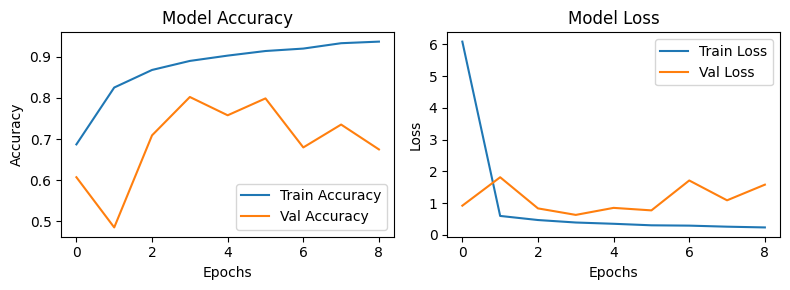

In [43]:
import matplotlib.pyplot as plt

# Eğitim geçmişi doğrulama doğruluğu ve doğrulama kaybını çizme
def plot_training_history(history):
    # Doğrulama doğruluğu eğrisini çiz
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Doğrulama kaybı eğrisini çiz
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Eğitim sonrası eğriyi çiz
plot_training_history(history)


In [ ]:
# Doğruluk skorunu hesapla
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print(f"LSTM Accuracy Score -> {accuracy * 100:.2f}%")

LSTM Accuracy Score -> 81.93%


In [ ]:
#LSTM TABANLI RNN MODELİ

Epoch 1/60
438/438 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.4867 - loss: 2.3964 - val_accuracy: 0.7058 - val_loss: 0.7500 - learning_rate: 5.0000e-04
Epoch 2/60
438/438 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.7963 - loss: 0.9410 - val_accuracy: 0.8253 - val_loss: 0.4846 - learning_rate: 5.0000e-04
Epoch 3/60
438/438 ━━━━━━━━━━━━━━━━━━━━ 521s 1s/step - accuracy: 0.8668 - loss: 0.6098 - val_accuracy: 0.8242 - val_loss: 0.5462 - learning_rate: 5.0000e-04
Epoch 4/60
438/438 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.9058 - loss: 0.4441 - val_accuracy: 0.8462 - val_loss: 0.5198 - learning_rate: 5.0000e-04
Epoch 5/60
438/438 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.9245 - loss: 0.3579 - val_accuracy: 0.8279 - val_loss: 0.6523 - learning_rate: 5.0000e-04
Epoch 6/60
438/438 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - accuracy: 0.9497 - loss: 0.2601 - val_accuracy: 0.8451 - val_loss: 0.5979 - learning_rate: 2.5000e-04
Epoch 7/60
438/438 ━━━━━━━━━━━━━━━━━━━━ 511s 1s/step - acc

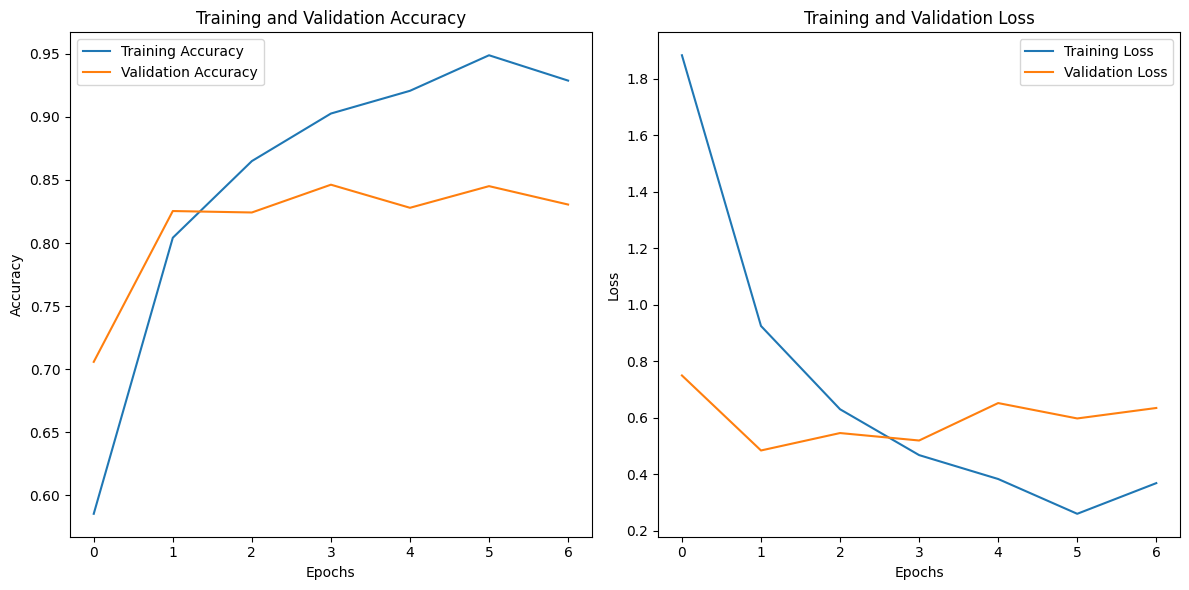

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, BatchNormalization, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Hiperparametreler
max_features = 10000  # Kelime sayısını artırarak modelin kelime dağarcığını genişlet
max_len = 150  # Dizi uzunluğunu artırarak daha fazla bilgi kaydedin
embedding_dim = 128  # Gömme boyutunu optimize et
dropout_rate = 0.4  # Dropout oranını %40 olarak ayarla
learning_rate = 0.0005  # Öğrenme oranını küçük tutarak daha stabil eğitim sağla

# Veri setinizi hazırlayın (X ve y)
# X_train, X_test ve y_train, y_test veri setlerinin doğru şekilde tanımlandığından emin olun
# Örnek: X_train = ['metin1', 'metin2', ...], y_train = [-1, 0, 1, ...]

# Tokenizer tanımla ve veriyi dönüştür
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Eğitim ve test verilerini tam sayılara çevir ve sıfırlarla doldur
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# One-hot encoding ile etiketleri dönüştür
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

# Sınıf ağırlıklarını belirleyin (dengesiz sınıflar için)
class_weights = {-1: 1., 0: 2., 1: 3.}  # -1 sınıfına 1, 0 sınıfına 2, 1 sınıfına 3 ağırlık atandı

# Modeli oluştur
model = Sequential([
    Embedding(max_features, embedding_dim, input_length=max_len, trainable=True),
    Bidirectional(LSTM(128, activation='tanh', return_sequences=True, kernel_initializer='he_normal', dropout=dropout_rate)),
    Bidirectional(LSTM(64, activation='tanh', kernel_initializer='he_normal', dropout=dropout_rate)),
    BatchNormalization(),  # BatchNormalization ekleyin
    Dropout(dropout_rate),
    Dense(3, activation='softmax')  # Softmax aktivasyon ile çoklu sınıf çıkışı
])

# Öğrenme oranını ayarlayın
optimizer = Adam(learning_rate=learning_rate)

# Modeli derle
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma ile eğitimi durdurma ve Öğrenme oranı düşürme
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Modeli eğit
history = model.fit(
    X_train_pad, y_train_onehot,  # y_train_onehot çoklu sınıf etiketlerinin one-hot kodlanmış hali
    epochs=60, batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,  # Sınıf ağırlıklarını ekle
    callbacks=[early_stopping, lr_scheduler]
)

# Test verileri üzerinde tahmin yap
predictions_rnn = np.argmax(model.predict(X_test_pad), axis=1)  # Çoklu sınıf tahmini

# Doğruluk skorunu hesapla
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print(f"RNN Accuracy Score -> {accuracy * 100:.2f}%")

# Detaylı metrik raporu
print(classification_report(np.argmax(y_test_onehot, axis=1), predictions_rnn))

# Eğitim süreci doğrulama doğruluğu ve doğrulama kaybı eğrisini çizme
plt.figure(figsize=(12, 6))

# Doğrulama doğruluğu
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Doğrulama kaybı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Doğruluk skorunu hesapla
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print(f"LSTM Accuracy Score -> {accuracy * 100:.2f}%")

LSTM Accuracy Score -> 80.49%


In [ ]:
#CNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Hiperparametreler
max_features = 7000  # Maksimum kelime sayısı
max_len = 100  # Maksimum dizi uzunluğu
embedding_dim = 128  # Gömme boyutu
filter_size = 64  # Konvolüsyonel filtre sayısı
kernel_size = 3  # Konvolüsyonel çekirdek boyutu
pool_size = 2  # Maksimum havuzlama boyutu
dropout_rate = 0.4  # Dropout oranı

# Veri setinizi hazırlayın (X ve y)
# X_train, X_test ve y_train, y_test veri setlerinin doğru şekilde tanımlandığından emin olun
# Örnek: X_train = ['metin1', 'metin2', ...], y_train = [-1, 0, 1, ...]

# Tokenizer tanımla ve veriyi dönüştür
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)  # X_train metin verisi

# Eğitim ve test verilerini tam sayılara çevir ve sıfırlarla doldur
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# One-hot encoding ile etiketleri dönüştür
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

# Sınıf ağırlıklarını belirleyin (dengesiz sınıflar için)
class_weights = {-1: 1., 0: 2., 1: 3.}

# CNN modelini oluştur
model = Sequential([
    Embedding(max_features, embedding_dim, input_length=max_len, trainable=True),

    # Konvolüsyonel katmanlar
    Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu', padding='same'),
    MaxPooling1D(pool_size=pool_size),

    # İkinci konvolüsyonel katman
    Conv1D(filters=filter_size*2, kernel_size=kernel_size, activation='relu', padding='same'),
    MaxPooling1D(pool_size=pool_size),

    # Flatten ve tam bağlı katmanlar
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(dropout_rate),  # Dropout katmanı
    BatchNormalization(),  # BatchNormalization ekleyin
    Dense(3, activation='softmax')  # Softmax aktivasyon ile çoklu sınıf çıkışı
])

# Öğrenme oranını ayarlayın
optimizer = Adam(learning_rate=0.001)

# Modeli derle
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma ile eğitimi durdurma
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğit
model.fit(
    X_train_pad, y_train_onehot,  # y_train_onehot çoklu sınıf etiketlerinin one-hot kodlanmış hali
    epochs=50, batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,  # Sınıf ağırlıklarını ekle
    callbacks=[early_stopping]
)

# Test verileri üzerinde tahmin yap
predictions_cnn = np.argmax(model.predict(X_test_pad), axis=1)  # Çoklu sınıf tahmini

# Doğruluk skorunu hesapla
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), predictions_cnn)
print(f"CNN Accuracy Score -> {accuracy * 100:.2f}%")

# Detaylı metrik raporu
print(classification_report(np.argmax(y_test_onehot, axis=1), predictions_cnn))


Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.5414 - loss: 1.7846 - val_accuracy: 0.7631 - val_loss: 0.6134
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8836 - loss: 0.5767 - val_accuracy: 0.8399 - val_loss: 0.5088
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.9583 - loss: 0.2257 - val_accuracy: 0.8465 - val_loss: 0.6081
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9767 - loss: 0.1257 - val_accuracy: 0.8419 - val_loss: 0.6909
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9836 - loss: 0.0909 - val_accuracy: 0.8363 - val_loss: 0.8703
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9838 - loss: 0.0878 - val_accuracy: 0.8432 - val_loss: 0.7994
Epoch 7/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9901 - loss: 0.0611 - val_accuracy: 0.8334 - val_loss: 0.8884
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
CNN Accuracy Score -> 82.18%
              preci

In [ ]:
#ÇİFT YÖNLÜ LSTM MODELİ

Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 210s 366ms/step - accuracy: 0.5554 - loss: 1.6650 - val_accuracy: 0.7451 - val_loss: 0.7747
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 200s 363ms/step - accuracy: 0.8275 - loss: 0.7480 - val_accuracy: 0.7213 - val_loss: 0.8683
Epoch 3/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 149s 364ms/step - accuracy: 0.8662 - loss: 0.5421 - val_accuracy: 0.7558 - val_loss: 0.8124
Epoch 4/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 201s 363ms/step - accuracy: 0.8960 - loss: 0.4504 - val_accuracy: 0.7692 - val_loss: 0.8612
Epoch 5/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 154s 375ms/step - accuracy: 0.9228 - loss: 0.3602 - val_accuracy: 0.7762 - val_loss: 0.8613
Epoch 6/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 200s 369ms/step - accuracy: 0.9326 - loss: 0.2771 - val_accuracy: 0.7753 - val_loss: 0.9185
Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 153s 363ms/step - accuracy: 0.5602 - loss: 1.6857 - val_accuracy: 0.7243 - val_loss: 0.7453
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 152s 372ms/step - accuracy: 0.8338 -

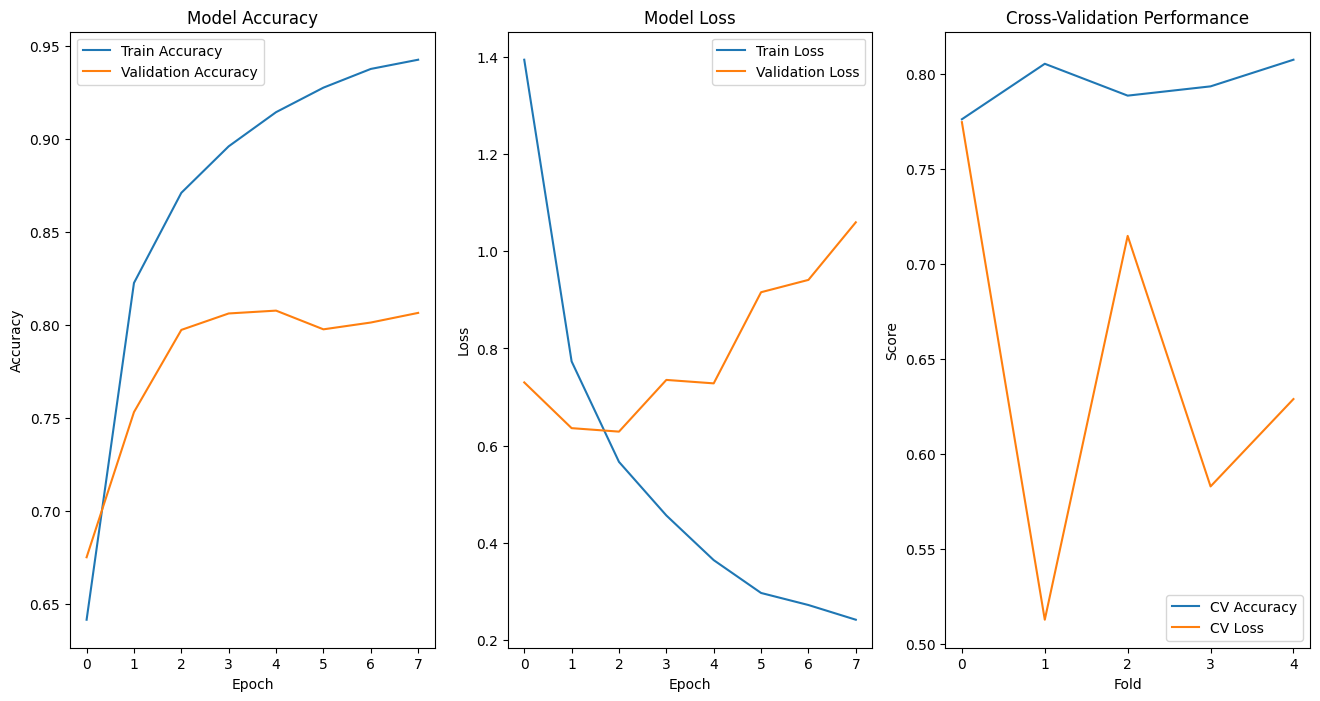

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Hiperparametreler
max_features = 8000  # Maksimum kelime sayısı 8000
max_len = 100        # Maksimum dizi uzunluğu
embedding_dim = 128  # Gömme boyutu
lstm_units = 128     # LSTM birim sayısı
dropout_rate = 0.45   # Dropout oranı 0.45 yapıldı

# Tokenizer tanımla ve veriyi dönüştür
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)  # X_train metinleri

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# One-hot encoding ile etiketleri dönüştür
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

# Sınıf ağırlıklarını belirleyin (dengesiz sınıflar için)
class_weights = {-1: 1., 0: 2., 1: 3.}

# Çapraz doğrulama kurulumu
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []
cv_losses = []

for train_idx, val_idx in kfold.split(X_train_pad, y_train):
    X_train_cv, X_val_cv = X_train_pad[train_idx], X_train_pad[val_idx]
    y_train_cv, y_val_cv = y_train_onehot[train_idx], y_train_onehot[val_idx]

    # Çift Yönlü LSTM modelini oluştur
    model = Sequential([
        Embedding(max_features, embedding_dim, input_length=max_len, trainable=True),
        Bidirectional(LSTM(lstm_units, return_sequences=False)),
        Dropout(dropout_rate),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')
    ])

    # Öğrenme oranını ayarlayın
    optimizer = Adam(learning_rate=0.001)

    # Modeli derle
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Erken durdurma ile eğitimi durdurma
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Modeli eğit
    history = model.fit(
        X_train_cv, y_train_cv,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_cv, y_val_cv),
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    cv_accuracies.append(max(history.history['val_accuracy']))
    cv_losses.append(min(history.history['val_loss']))

# Test verileri üzerinde tahmin yap
predictions_rnn = np.argmax(model.predict(X_test_pad), axis=1)

# Doğruluk skorunu hesapla
accuracy = accuracy_score(np.argmax(y_test_onehot, axis=1), predictions_rnn)
print(f"Bidirectional LSTM Accuracy Score -> {accuracy * 100:.2f}%")

# Detaylı metrik raporu
print(classification_report(np.argmax(y_test_onehot, axis=1), predictions_rnn))

# Eğitim ve doğrulama eğrilerini çiz
plt.figure(figsize=(16, 8))

# Doğruluk eğrisi
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Kayıp eğrisi
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Çapraz doğrulama doğruluğu
plt.subplot(1, 3, 3)
plt.plot(cv_accuracies, label='CV Accuracy')
plt.plot(cv_losses, label='CV Loss')
plt.title('Cross-Validation Performance')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()

plt.show()


In [ ]:
from gensim.models import Word2Vec

ukuran_vektor = 100

# Assuming 'X_train' contains your preprocessed text data
# Tokenize each document in X_train
tokenized_documents = [doc.split() for doc in X_train]

# Now you can use tokenized_documents in Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor, sg=1)

In [ ]:
print(word2vec_model)

Word2Vec<vocab=16647, vector_size=100, alpha=0.025>


In [ ]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
eur : 0
net : 1
company : 2
profit : 3
rs : 4
mn : 5
stocks : 6
year : 7
sales : 8
million : 9
shares : 10
finnish : 11
said : 12
crore : 13
co : 14
market : 15
https : 16
quarter : 17
group : 18
new : 19
mln : 20
operating : 21
per : 22
bank : 23
stock : 24
period : 25
finland : 26
share : 27
business : 28
loss : 29
india : 30
5 : 31
000 : 32
first : 33
services : 34
euro : 35
may : 36
financial : 37
markets : 38
oyj : 39
3 : 40
nifty : 41
1 : 42
also : 43
4 : 44
cent : 45
high : 46
2 : 47
capital : 48
oil : 49


In [ ]:
# Assuming 'df' is your original DataFrame that contains the 'text' column
train_df = df.copy()  # Create a copy of the original DataFrame and name it 'train_df'
train_df['Text_prepro'] = train_df['text'].apply(preprocess_text)  # Apply preprocessing function
max_length = train_df['Text_prepro'].apply(lambda x: len(x.split())).max() # Now calculate max_length

In [ ]:
max_length

60

In [ ]:
max_length_index = train_df['Text_prepro'].apply(len).idxmax()
print("Index baris dengan max_length adalah :", max_length_index)

Index baris dengan max_length adalah : 10959


In [ ]:
train_df.at[max_length_index, 'Text_prepro']

'technicalanalysis elliottwave priceaction swingtrader swingtrading motivation luxurylifestyle stockmarket millionaire cash fxsignals successful stock trading investment knowledge forex makemoney motivated wallstreet scalping financial financialfreedom co kidwecjg'

In [ ]:
# Replace 'Text' with the actual column name containing the original text
train_df.at[max_length_index, 'text']  # Assuming 'text' is the correct column name

' technicalanalysis  elliottwave  priceaction  swingtrader  swingtrading  motivation  luxurylifestyle  stockmarket  millionaire  cash  fxsignals  successful  stocks  trading  investment  knowledge  forex  makemoney  motivated  wallstreet   scalping  financial  financialfreedom https   t co k8idwecjg5'

In [ ]:
sequences = []
for doc in train_df['Text_prepro']:
    text = clean_text(doc)
    sequence = []
    for word in text:
        try:
            # Attempt to get the index of the word from the Word2Vec model
            sequence.append(word2vec_model.wv.key_to_index[word])
        except KeyError:
            # If the word is not found, either ignore it or assign a default value
            # Option 1: Ignore the unknown word
            # pass
            # Option 2: Assign a default value (e.g., 0)
            sequence.append(0)
    sequences.append(sequence)

In [ ]:
len(sequences)

21862

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
padded_sequences.shape

(21862, 60)

In [ ]:
y = np.asarray(train_df['score'])

In [ ]:
jumlah_kelas=len(train_df["score"].unique())

In [ ]:
jumlah_kelas

3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y,
                                            test_size=0.3,
                                            random_state=42, stratify=y)

In [ ]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input,Embedding,GlobalMaxPooling1D
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                  trainable=False))
model.add(LSTM(ukuran_vektor, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(jumlah_kelas, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
#BIDIRECTIONAL LSTM ENBEDDING TEKNIGI

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Data preparation (example)
# Assuming you have your data in a DataFrame 'train_df' with 'Text_prepro' and 'score' columns
X = train_df['Text_prepro']  # Select text column
y = train_df['score']  # Select score/label column

# 1. Etiketleri sıfırdan başlayacak şekilde dönüştürme
y = y.astype('category').cat.codes  # Convert labels to 0, 1, 2 (if they were -1, 0, 1 originally)
print(np.unique(y))  # Kontrol et: 0, 1, 2 olmalı

# 2. Eğitim ve doğrulama setlerini ayırma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Verileri tokenizasyon ve sıralama (X_train ve X_val'ı uygun formatta hazırlama)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 7000  # Max kelime sayısı
max_len = 100  # Maksimum dizi uzunluğu
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)  # Metinleri eğitiyoruz

X_train_seq = tokenizer.texts_to_sequences(X_train)  # Eğitim verisini sayılara çevir
X_val_seq = tokenizer.texts_to_sequences(X_val)  # Doğrulama verisini sayılara çevir
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)  # Sıfırlama ile padding yapıyoruz
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)  # Aynı şekilde doğrulama verisini sıfırlıyoruz

# 4. Modeli oluşturma
model = Sequential([
    Embedding(input_dim=max_features, output_dim=128, input_length=max_len, trainable=True),
    Bidirectional(LSTM(128, activation='relu', kernel_initializer='he_normal', return_sequences=True)),
    LSTM(64, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')  # 3 sınıf için softmax aktivasyonu
])

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Erken durdurma için callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6. Modeli eğitme
history = model.fit(
    X_train_pad, y_train,  # Eğitim verisi
    epochs=60,  # Epoch sayısını artırdık
    batch_size=256,  # Batch boyutunu biraz artırdık
    validation_data=(X_val_pad, y_val),  # Doğrulama verisi
    callbacks=[early_stopping]  # Erken durdurma
)

# 7. Modeli değerlendirme
predictions = np.argmax(model.predict(X_val_pad), axis=1)  # Tahmin yapma

# 8. Sınıflandırma raporunu yazdırma
print(classification_report(y_val, predictions, target_names=['-1', '0', '1']))


[0 1 2]
Epoch 1/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6049 - loss: 0.8558 - val_accuracy: 0.5573 - val_loss: 0.9744
Epoch 2/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8651 - loss: 0.3727 - val_accuracy: 0.5609 - val_loss: 0.9129
Epoch 3/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9122 - loss: 0.2522 - val_accuracy: 0.6261 - val_loss: 0.8166
Epoch 4/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9298 - loss: 0.2010 - val_accuracy: 0.7265 - val_loss: 0.6899
Epoch 5/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9445 - loss: 0.1606 - val_accuracy: 0.7837 - val_loss: 0.5685
Epoch 6/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9543 - loss: 0.1275 - val_accuracy: 0.8027 - val_loss: 0.5217
Epoch 7/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9670 - loss: 0.0977 - val_accuracy: 0.8168 - val_loss: 0.5561
Epoch 8/60
69/69 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9694 - loss: 0.0880 - val_accuracy: 0.

In [ ]:
# Replace the original evaluate line:
# loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
# with:
loss, accuracy = model.evaluate(X_val_pad, y_val, verbose=0)
# Use X_val_pad which is the preprocessed and padded version of your text data
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 80.27%


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding_9', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 7000, 'output_dim': 128, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}


In [ ]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[-0.01774926 -0.003418   -0.01801335 ...  0.00724279 -0.03029587
  -0.03292952]
 [-0.04101794 -0.00211915  0.00365264 ... -0.01733536  0.02789244
   0.03499065]
 [-0.06540317 -0.04706103  0.04208628 ... -0.02002771  0.02027632
  -0.02619204]
 ...
 [-0.04424844  0.05441351  0.04604282 ... -0.02619411  0.05062838
  -0.00964622]
 [ 0.04119474  0.00778585 -0.06094953 ... -0.03502693  0.03397828
   0.01464775]
 [ 0.00865341  0.01557361 -0.04098716 ... -0.01287615 -0.02880764
  -0.06647932]]


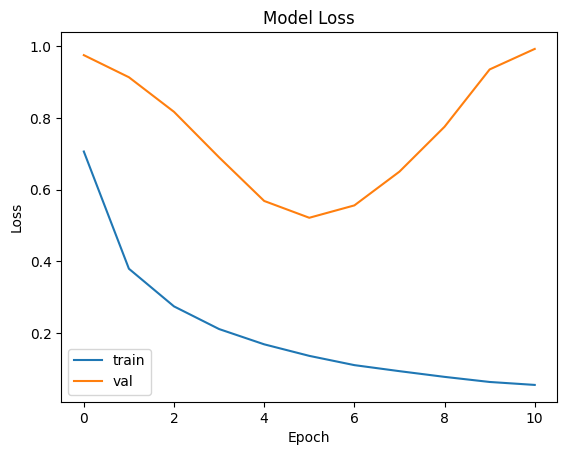

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

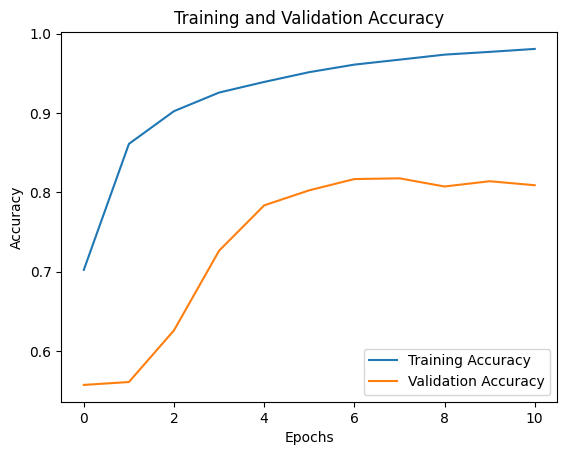

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 100, 128)            │         896,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100, 256)            │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,725,131 (14.21 MB)

 Trainable params: 1,241,667 (4.74 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 2,483,336 (9.47 MB)

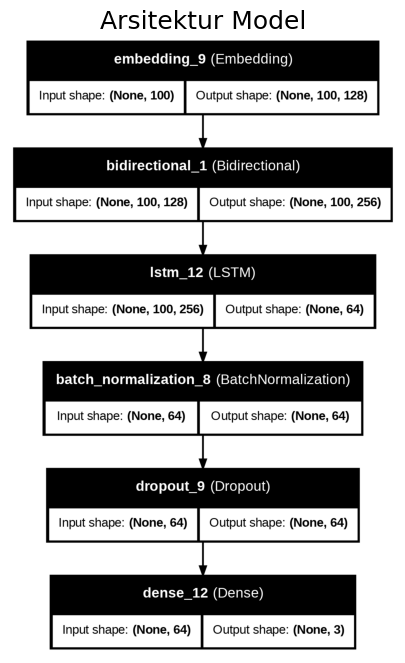

In [ ]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming X_val contains raw text strings and tokenizer is defined:
X_val_seq = tokenizer.texts_to_sequences(X_val)  # Convert to sequences
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)  # Pad sequences

y_pred = model.predict(X_val_pad)  # Predict on padded sequences
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(report)

137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.72       948
           1       0.78      0.91      0.84      1988
           2       0.81      0.77      0.79      1437

    accuracy                           0.80      4373
   macro avg       0.82      0.77      0.78      4373
weighted avg       0.81      0.80      0.80      4373



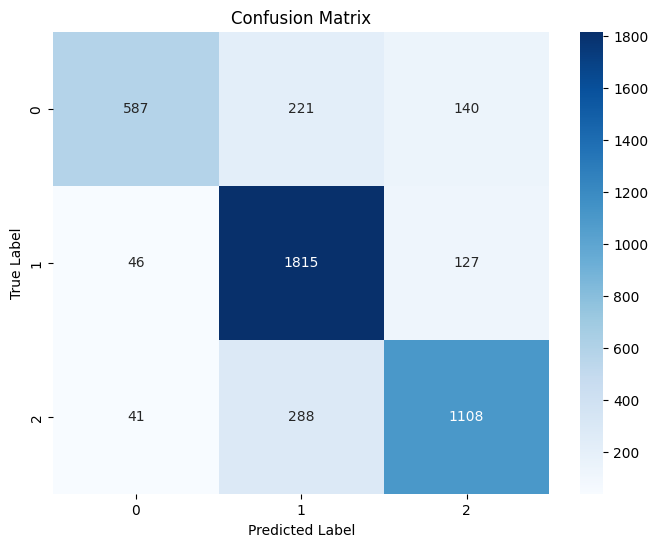

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("model_Amazon_Product_Reviews.h5")
word2vec_model.save("word2vec_model.model")
train_df.to_csv("train_data.csv", index=False)